# 03 - Distribuições de Probabilidade

Nessa aula, iremos tratar dos seguintes conteúdos:
- Tipos de Variáveis Aleatórias
- Esperança e Variância
- Distribuição de Probabilidade
- Distribuição - Bernoulli e Binomial
- Distribuição Poisson
- Distribuição Exponencial
- Distribuição Uniforme

<img src = "http://storage.ning.com/topology/rest/1.0/file/get/1490420457?profile=original" width=800>

## 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Tipos de Variáveis Aleatórias


<br>

Vimos que uma __variável aleatória__ é uma variável cujo valor depende de fatores não determinísticos, ou melhor dizendo __probabilísticos__. Detalhando um pouco mais sobre as variáveis aleatórias, existem dois tipos mais comuns que vamos trabalhar no nosso curso, sendo elas:

- __Discreta:__ são as variáveis aleatórias que a distribuição de probabilidade assume apenas valores enumeráveis;

- __Contínua:__ são as variáveis aleatórias que a distribuição de probabilidade assume valores contínuos dentro de um intervalo pré-determinado.

Mas para realmente entendermos a diferença entre cada uma delas, precisamos definir o que são __distribuições de probabilidade__.

## 

## Distribuições de Probabilidade

<br>

Uma **distribuição de probabilidade** é uma função que descreve o comportamento aleatório de um fenômeno dependente do acaso.

A distribuição de probabilidade pode **modelar incertezas** e descrever fenômenos físicos, biológicos, econômicos, entre outros.

A representação matemática para a distribuição de probabilidade é feita utilizando o que chamamos de __função de densidade de probabilidade__. Para cada um dos casos de variáveis aleatórias temos uma definição de densidade de probabilidade, conforme veremos agora:

- __Discretas:__ Para o caso das variáveis aleatórias discretas a definição matemática para a função de densidade de probabilidade, pode ser dada da seguinte forma:

$$ P(X = x) = F(X) $$

Ou seja, para o caso discreto, a variável aleatória assume é uma função que assume um valor real para cada elemento do espaço amostral. Partir das definições gerais para probabilidade, são conhecidas as seguintes são sempre válidas:

- $ 0 \leq P(X = x) \leq 1 $;

<br>

- $ P(X = x) \geq 0 $;

<br>

- $ \sum_{i=1}^{\infty} P(X = x_{i}) = 1 $ ;

<br>

- $ P(a \leq X \leq b) = \sum_{x = a}^{x = b} P(X = x)$;

## 

- __Contínuas:__ Para o caso das variáveis aleatórias contínuas a definição matemática para a função de densidade de probabilidade, pode ser dada da seguinte forma:

$$ P(X) = \int p(x) \,dx $$

Da mesma forma que para o caso discreto, vamos definir algumas relações conhecidas as v. a. contínuas:

- $ p(x) \geq 0, \forall x \in \mathbb{R}$;

<br>

- $ \int_{-\infty}^{\infty} p(x) \,dx = 1 $ ;

<br>

- $ P(a \leq X \leq b) = \int_{a}^{b} p(x) \,dx$;

<br>

Uma outra forma de interpretarmos a probabilidade de uma dada distribuição entre o intervalo $a$ e $b$, seria como a área abaixo ao gráfico da função de densidade de probabilidade:

<img src="https://work.thaslwanter.at/Stats/html/_images/PDF.png" width=400>


## 

## Valor Esperado (Esperança) e Variância

<br>

Assim como no caso da Estatística Descritiva, no casos de modelos probabilísticos também existem parâmetros de posição e variabilidade utilizada para caracterizar uma distribuição de probabilidade:

- __Valor Esperado (Esperança):__ O valor esperado seria o produto da variável aleatória $x$ e sua respectiva probabilidade, funcionando como se fosse uma média ponderada para as probabilidades. O cálculo do valor esperado é definido da seguinte forma:


__Caso Discreto:__  $ E[X] = \sum xP(X = x) $


__Caso Contínuo:__  $ E[X] = \int xp(x) dx $

<br><br>

- __Variância:__ A variância é o valor que mede a variabilidade, ou seja o quão dispersão estão as probabilidade em relação ao valor esperado. A variância é definida da seguinte forma:

<br>

$$ V[X] = \sigma^{2} = E[(X - E[X])^2] = E[X^2] - E[X]^2$$

<br>
Onde, $ E[X^2] = \sum x^2P(X = x)$.

__Exemplo:__ Seja a variável aleatória X com distribuição abaixo, calcule $E[X]$ e $V[X]$:
 
- P(X = 1) = 0.3
- P(X = 2) = 0.4
- P(X = 3) = 0.2 
- P(X = 4) = 0.1

In [2]:
# Definir o vetor de eventos
X = [1, 2, 3, 4]

# Definir o vetor de probabilidades
P = [0.3, 0.4, 0.2, 0.1]

# Calcular a esperança
esp = np.dot(X, P)

# Print da esperança
print("Esperança: ", np.round(esp, 3))

Esperança:  2.1


In [3]:
# Calculo da esperança de x^2
x2 = np.power(X, 2)

# print do x2
print("x^2: ", x2)

x^2:  [ 1  4  9 16]


In [4]:
# Calcular a esperança do x^2
esp_x2 = np.dot(x2, P)

# Calcular a variância = esp_x2 - (esP)^2
var = esp_x2 - (esp)**2

# Print da variancia
print("Variância: ", np.round(var, 3))

Variância:  0.89


__Exemplo:__ A variável X tem função de densidade de probabilidade dada por:

- $f(x) = \frac{x^2}{3}$, se $ -1 \leq x \leq 2$, caso contrário seria 0.

In [5]:
# biblioteca scipy
# ! pip install scipy

In [6]:
# carrega uma função que aproxime uma integral
from scipy.integrate import quad

In [7]:
# Função para a esperança
def f1(x):
    return x*(x*x)/3

In [8]:
# Calculando a integral de -1, 2
esp, erro1 = quad(f1, -1, 2)

# Print da Esperança e do erro
print("Esperança: ", esp)
print("Erro da Integral: ", erro1)

Esperança:  1.25
Erro da Integral:  1.5728145305099745e-14


In [9]:
# Definindo uma função para a esperança de x^2
def f2(x):
    return (x*x)*(x*x)/3

In [10]:
# Calculando a integral de esp de x^2
esp_x2, erro2 = quad(f2, -1, 2)

In [11]:
# Calculando a variância
var = esp_x2 - esp**2

# Prints
print("Variância: ", np.round(var, 4))
print("Erro da 2 integral: ", erro2)

Variância:  0.6375
Erro da 2 integral:  2.4424906541753447e-14


## 

## Distribuições

Nos próximos tópicos, vamos apresentar algumas das principais distribuições utilizadas!

## 

## Distribuição de Bernoulli/Binomial

A distribuição de Bernoulli  é uma distribuição discreta para um espaço amostral $k \in \{0, 1\}$, baseando a probabilidade em __sucessos__ e __falhas__. Onde a probabilidade de sucesso de um evento ($k = 1$) é igual a $p$ e a probabilidade de falha ($k = 0$) seria o valor complementar $1 - p$. A função que descreve a distribuição de Bernoulli pode ser definida como:

<br>

$$ P(X = k) = p^{k}(1-p)^{(1-k)} $$

<br>
Os valores para o valor esperado e a variância para a distribuição de Bernoulli serão respectivamente:

- __Valor Esperado:__ $ E[X] = p $;

- __Variância:__ $ V[X] = p(1-p)$.

<br>

Mas o caso da distribuição de Bernoulli, tratamos apenas para um evento isolado, como por exemplo o lançamento de uma moeda. Quando trabalhamos com eventos __com repetições__, utiliza-se o caso geral da distribuição de Bernoulli que seria uma __Distribuição Binomial.__


### Distribuição Binomial

Seja a variável aleatória baseado em $n$ repetições de Bernoulli, temos que a definição da distribuição Binomial é dada por:

$$ P(X = k) = \binom{n}{k}p^{k}(1-p)^{(n-k)} = \frac{n!}{k!(n - k)!}p^{k}(1-p)^{(n-k)}$$

<br>
Os valores para o valor esperado e a variância para a distribuição Binomial serão respectivamente:

- __Valor Esperado:__ $ E[X] = np $;

- __Variância:__ $ V[X] = np(1-p)$.

In [12]:
# Gerando numero aleatorios de acordo com yma binomial
np.random.binomial(1, 0.8, 20)

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [13]:
# Calculando a proporção
pd.Series(np.random.binomial(1, 0.8, 10000000)).value_counts(normalize = True)

1    0.799794
0    0.200206
dtype: float64

__Exemplo:__ Em uma caixa há 8 bolas brancas e 4 pretas. Retira-se 5 bolas com reposição. Calcule a probabilidade de que:

__A)__ saiam duas bolas brancas:

In [14]:
# Definindo uma função para o binomial
# Carrega a função fatorial
from math import factorial

# Definir uma função
def binomial(n, p, k):
    # Criando a combinação
    C = (factorial(n)/(factorial(k)*factorial(n-k)))
    return C*(np.power(p, k))*(np.power(1-p, n-k))

In [15]:
# numero de repetições
n = 5

# numero de brancas
k = 2

# probabilidade da bola branca
p = 8/12

# calculo da probabilidade
print("A probabilidade será: ", np.round(binomial(n, p, k)*100, 3), " %")

A probabilidade será:  16.461  %


__B)__ saiam pelo menos 3 pretas:

In [16]:
# numero de repetições
n = 5

# probabilidade da bola preta
p = 4/12

# Calculando a probabilidade acumulada
prop = 0
for k in range(3, n+1):
    prop += binomial(n,p,k)
    
# print do resultado
print("A probabilidade será: ", np.round(prop*100, 3), " %")

A probabilidade será:  20.988  %


## 

## Distribuição de Poisson

Uma variável aleatória tem distribuição de Poisson quando podemos descrever um evento em relação ao uma taxa/contagem de ocorrência, normalmente chamada de $ \lambda $, sendo $ \lambda > 0$. Dessa forma a equação para a distribuição de Poisson será definida como:

$$ P(X = k) = \frac{e^{-\lambda}\lambda^{k}}{k!} $$

<br>
Os valores para o valor esperado e a variância para a distribuição de Poisson serão respectivamente:

- __Valor Esperado:__ $ E[X] = \lambda $;

- __Variância:__ $ V[X] = \lambda$.

__Exemplo:__ Em uma central telefônica chegam 300 ligações por hora. Sabendo que segue uma distribuição de Poisson, qual é a probabilidade de que:
   
__A)__ Em um minuto não ocorra ligações;

In [17]:
# Criando uma função para a poisson
def poisson(lbd, k):
    return (np.exp(-lbd)*(lbd**k))/factorial(k)

In [18]:
# Definir o valor de lambda para o exercicio
lbd = 300/60 # 5 ligações por minuto

# Frequencia procurada k = 0
k = 0

# Calcular a probabilidade
print("A probabilidade será: ", np.round(poisson(lbd, k)*100, 3), " %")

A probabilidade será:  0.674  %


__B)__ Em 2 minutos ocorram 2 chamadas;

In [19]:
# definindo o lambda
lbd = 10 # 5 ligações por min = 10 ligações a cada 2 minutos

# Frequencia procurada k = 2
k = 2

# Calcular a probabilidade
print("A probabilidade será: ", np.round(poisson(lbd, k)*100, 3), " %")

A probabilidade será:  0.227  %


## 

## Distribuição Exponencial

Uma variável aleatória continua tem uma distribuição Exponencial quando queremos avaliar o tempo decorrido entre dois eventos consecutivos, diferente do Poisson que avalia de acordo com uma contagem de ocorrências em um espaço de tempo. A função densidade de probabilidade que descreve a distribuição exponencial pode ser descrita como:

$$ f(x) = \alpha e^{-\alpha x}, x \geq 0 $$

No caso para $x < 0$, a probabilidade de $f(x) = 0$

<br>
Os valores para o valor esperado e a variância para a distribuição exponencial serão respectivamente:

- __Valor Esperado:__ $ E[X] = \frac{1}{\alpha} $;

- __Variância:__ $ V[X] = \frac{1}{\alpha^2}$.


__Exemplo:__ O intervalo de tempo, em minutos, entre emissões consecutivas de uma fonte radioativa é uma variável aleatória contínua que segue uma distribuição exponencial com parâmetro $\alpha = 0.2$. Qual a probabilidade de que ocorra uma emissão em um intervalo inferior a 2 minutos?

In [20]:
# Criando a função exponencial
def exponencial(x):
    alpha = 0.2
    return alpha*np.exp(-alpha*x)

In [21]:
# Calculando a integral da exponencial
prob, erro = quad(exponencial, 0, 2)

# Print da probabilidade
print("A probabilidade será: ", np.round(prob*100, 3), " %")

A probabilidade será:  32.968  %


## 

## Distribuição Uniforme

A distribuição uniforme é uma distribuição bem simples e não possui parâmetros, a única diferença é que só vai haver probabilidade para um determinado exento $x$, se $x \in [a, b]$. Dessa forma a equação de densidade de probabilidade para a distribuição uniforme é dado por:

$$ f(x) = \frac{1}{b - a}, a \leq x \leq b $$

E para o caso de $x \notin [a, b]$, a função de densidade será $f(x) = 0$

<br>
Os valores para o valor esperado e a variância para a distribuição exponencial serão respectivamente:

- __Valor Esperado:__ $ E[X] = \frac{a + b}{2} $;

- __Variância:__ $ V[X] = \frac{(b - a)^2}{12}$.


In [22]:
# Definindo um numero de amostras
N = 100

#criando as amostras
amostra = np.random.uniform(0, 1, N)

amostra

array([0.45088329, 0.22692104, 0.41623335, 0.32329961, 0.39656068,
       0.16561616, 0.51456218, 0.0524953 , 0.12415302, 0.97393171,
       0.48973656, 0.29660188, 0.97472534, 0.56505918, 0.77304662,
       0.85822689, 0.94853815, 0.86502546, 0.44761471, 0.08185659,
       0.58440869, 0.09783707, 0.62268227, 0.06786965, 0.67348812,
       0.87889352, 0.74771989, 0.17265835, 0.00408655, 0.30140482,
       0.60722344, 0.9166955 , 0.56612868, 0.84045956, 0.46054678,
       0.16370824, 0.1701778 , 0.12407656, 0.52162439, 0.0154413 ,
       0.49214779, 0.77256667, 0.4402334 , 0.40608206, 0.68672291,
       0.72048803, 0.66452249, 0.06430593, 0.12453362, 0.26942299,
       0.13756178, 0.84905051, 0.74035639, 0.8976881 , 0.733165  ,
       0.00479535, 0.38490228, 0.060825  , 0.01657956, 0.76365329,
       0.73422077, 0.97588607, 0.82915105, 0.9399801 , 0.87766345,
       0.33307027, 0.418382  , 0.5699827 , 0.1791118 , 0.44612627,
       0.15161902, 0.69335997, 0.6013319 , 0.57937599, 0.59895

C:\Users\ITX Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


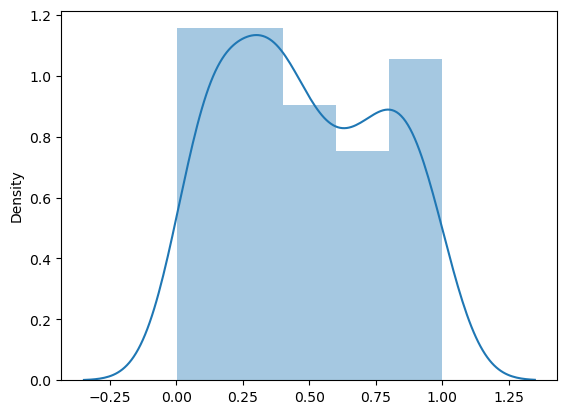

In [23]:
# Definindo um numero de amostras
N = 100

#criando as amostras
amostra = np.random.uniform(0, 1, N)

# Mostrando a distribuição e o histograma
sns.distplot(amostra)

# mostrando o gráfico
plt.show()

C:\Users\ITX Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


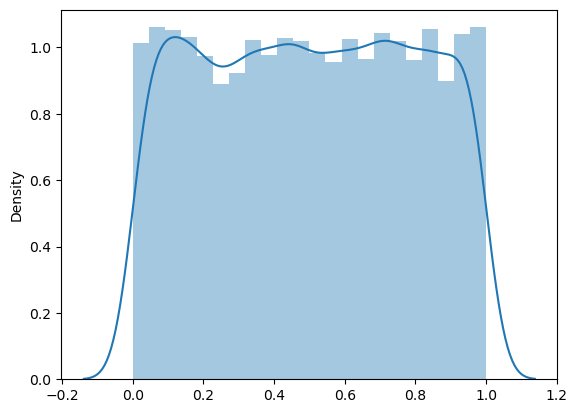

In [24]:
# Definindo um numero de amostras
N = 10000

#criando as amostras
amostra = np.random.uniform(0, 1, N)

# Mostrando a distribuição e o histograma
sns.distplot(amostra)

# mostrando o gráfico
plt.show()

C:\Users\ITX Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


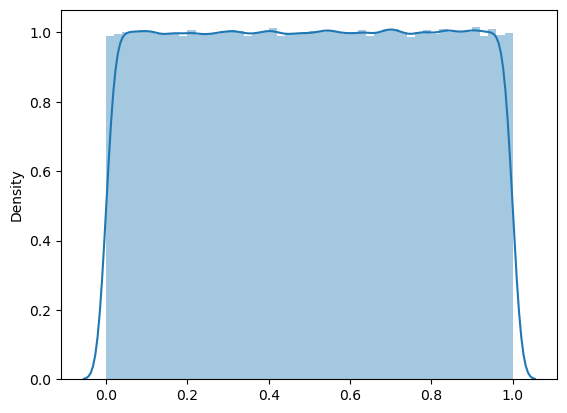

In [25]:
# Definindo um numero de amostras
N = 1000000

#criando as amostras
amostra = np.random.uniform(0, 1, N)

# Mostrando a distribuição e o histograma
sns.distplot(amostra)

# mostrando o gráfico
plt.show()

## 

## Exercícios

__1)__ Em uma caixa há 7 bolas brancas, 4 pretas e 5 vermelhas. Retira-se 6 bolas com reposição. Calcule a probabilidade de que:

__A)__ saiam 4 bolas vermelhas:

__B)__ pelo menos 3 bolas brancas:

__C)__ 1 ou 2 bolas pretas.

## 

__2)__ Em um livro de 800 páginas há 800 erros de impressão. Qual a probabilidade de que uma página contenha pelo menos 3 erros?

## 

__3)__ Numa criação de coelhos, 45% são machos. Qual a probabilidade de nascerem pelo menos 5 coelhos machos num dia em que nasceram 15 coelhos?

## 

__4)__ Numa estrada há 2 acidentes para cada 100 km. Qual a probabilidade de que em:

__A)__ 250 km pelo menos 3 acidentes?

__B)__ 300 km ocorram 5 acidentes?